In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import os

load the audio file as a timeseries in y and store sampling rate as sr(measured in Hz)
default sr is 22kHz

In [2]:
def getFeatures(path):
    y, sr = librosa.load(path)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)


    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_delta = librosa.feature.delta(mfcc)
    
    features = []
    features.append(tempo)
    features.append(np.sum(beats))
    features.append(np.mean(chroma_stft))
    features.append(np.mean(rms))
    features.append(np.mean(cent))
    features.append(np.mean(spec_bw))
    features.append(np.mean(rolloff))
    features.append(np.mean(zcr))
    for coefficient in mfcc:
        features.append(np.mean(coefficient))
    return features   

## Dataset:
1. Our training dataset can be found [here](https://iiitaphyd-my.sharepoint.com/personal/devansh_manu_research_iiit_ac_in/_layouts/15/onedrive.aspx?originalPath=aHR0cHM6Ly9paWl0YXBoeWQtbXkuc2hhcmVwb2ludC5jb20vOmY6L2cvcGVyc29uYWwvZGV2YW5zaF9tYW51X3Jlc2VhcmNoX2lpaXRfYWNfaW4vRWxZZm1zQ3h0Q2xJcjJLSVBqcWEzYUFCdFVva2xha2cwNnBCMDJMMmlKaWVIdz9ydGltZT1UNjRHc1lqQzEwZw&viewid=5db72c70%2D223f%2D4887%2Dbf50%2Dbd0fbf14638f&id=%2Fpersonal%2Fdevansh%5Fmanu%5Fresearch%5Fiiit%5Fac%5Fin%2FDocuments%2FMMT%20%2D%20Hands%20on%20activity%2FEmotion%20Classification)
2. From the above link, we picked up the Arousal and Valence data.
3. From [this](https://onedrive.live.com/?authkey=%21ABJMt2rGTQvCxyM&id=3E1ACB43A24F0BDA%21352&cid=3E1ACB43A24F0BDA) link, we picked up the already-annotated Tension data.
4. Training of our model was done on the above mentioned Arousal, Valence and Tension dataset. 
5. Our testing, which you would see at the end of this notebook, is done on the un-annotated data mentioned in this [link](https://onedrive.live.com/?authkey=%21ABJMt2rGTQvCxyM&id=3E1ACB43A24F0BDA%21122&cid=3E1ACB43A24F0BDA)

Get training data-directory names

In [3]:
feature_set, y_labels = [], []
dir_list = ["../emotion_dataset/training/Arousal/", "../emotion_dataset/training/Valence/", "../emotion_dataset/training/Tension/"]

In [4]:
os.getcwd()

'/home/laferrari/IIIT-H SEMESTERS/8th_sem/Music, Mind and Technology/assignment2/src'

Extracting features for Arousal and Valence music tracks

In [5]:
for i in range(2):
    dirName1, dirName2 = dir_list[i]+"Positive/", dir_list[i]+"Negative/"
    dirContents = os.listdir(dirName1)
    temp_y_label = "A"
    if i == 1:
        temp_y_label = "V"
    for music in dirContents:
        currSongFeatures = getFeatures(dirName1+music)
        y_labels.append(temp_y_label+"P")
        feature_set.append(currSongFeatures)
    dirContents = os.listdir(dirName2)    
    for music in dirContents:
        currSongFeatures = getFeatures(dirName2+music)
        y_labels.append(temp_y_label+"N")
        feature_set.append(currSongFeatures)

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

This <font color="red">warning</font> will always occur when loading mp3 because libsndfile does not (yet/currently) support the mp3 format. Librosa tries to use libsndfile first, and if that fails, it will fall back on the audioread package, which is a bit slower and more brittle, but supports more formats.

The types of labels gathered uptill now, i.e. Arousal and Valence(both can be positive and negative)

In [6]:
print(set(y_labels))

{'VP', 'VN', 'AN', 'AP'}


In [7]:
dirName = dir_list[-1]
dirContents = os.listdir(dirName)
for music in dirContents:
    temp_y_label = music.split("_")[-1][:2]
    if temp_y_label == "TN" or temp_y_label == "TP":
        currSongFeatures = getFeatures(dirName+music)
        feature_set.append(currSongFeatures)
        y_labels.append(temp_y_label)

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

In [8]:
print(len(y_labels))
print(len(feature_set))

189
189


In [9]:
print(set(y_labels))

{'VN', 'TP', 'TN', 'VP', 'AN', 'AP'}


In [10]:
feature_set = np.array(feature_set)

In [11]:
feature_set.shape

(189, 28)

In [12]:
y = np.array(y_labels)
y.shape

(189,)

In [13]:
feature_list = ['tempo', 'beats', 'chromagram', 'rmse',
           'centroid', 'bandwidth', 'rolloff', 'zcr', 'mfcc1', 'mfcc2',
           'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
           'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
           'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

In [14]:
import seaborn as sns

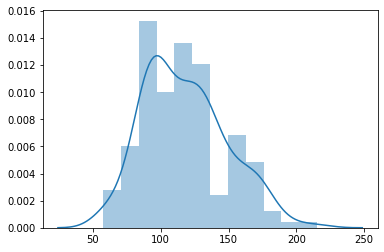

In [15]:
sns.distplot(feature_set[:,0])

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

## model1:
1. this uses categorical crossentropy as the loss function
2. We use 10% of our entire training data for validation
3. mini-batch size is 32

In [92]:
clear_session()
model1 = Sequential()
model1.add(Dense(128, input_shape=(feature_set.shape[1],), activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(2048, activation='relu'))
model1.add(Dense(6, activation='softmax'))

In [93]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [94]:
model1.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=["accuracy"])

In [95]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 12294     
Total params: 2,411,398
Trainable params: 2,411,398
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split

In [23]:
encoder = LabelEncoder()
encoder.fit(y_labels)
encoded_Y = encoder.transform(y_labels)
Y = to_categorical(encoded_Y)

In [24]:
print(Y.shape)

(189, 6)


In [96]:
x_train, x_val, y_train, y_val = train_test_split(feature_set, Y, test_size=0.1, random_state=42)

In [97]:
print("shape of training data is: ", x_train.shape)
print("shape of training label is: ", y_train.shape)
print("shape of testing data is: ", x_val.shape)
print("shape of testing label is: ", y_val.shape)

shape of training data is:  (170, 28)
shape of training label is:  (170, 6)
shape of testing data is:  (19, 28)
shape of testing label is:  (19, 6)


In [98]:
results = model1.fit(x_train, y_train, epochs=20, callbacks=[es],validation_data=([x_val, y_val]), batch_size=32)

Train on 170 samples, validate on 19 samples
Epoch 1/20
170/170 [==============================] - 1s 7ms/sample - loss: 846.0904 - accuracy: 0.1706 - val_loss: 480.6028 - val_accuracy: 0.2105
Epoch 2/20
170/170 [==============================] - 0s 2ms/sample - loss: 449.6308 - accuracy: 0.2647 - val_loss: 359.6826 - val_accuracy: 0.1579
Epoch 3/20
170/170 [==============================] - 0s 2ms/sample - loss: 130.2076 - accuracy: 0.2118 - val_loss: 97.5759 - val_accuracy: 0.2632
Epoch 4/20
170/170 [==============================] - 0s 2ms/sample - loss: 54.6664 - accuracy: 0.2118 - val_loss: 80.7580 - val_accuracy: 0.2105
Epoch 5/20
170/170 [==============================] - 0s 3ms/sample - loss: 44.4781 - accuracy: 0.2412 - val_loss: 21.2245 - val_accuracy: 0.2105
Epoch 6/20
170/170 [==============================] - 0s 3ms/sample - loss: 17.1102 - accuracy: 0.2471 - val_loss: 24.3075 - val_accuracy: 0.1579
Epoch 7/20
170/170 [==============================] - 1s 4ms/sample - loss

In [ ]:
import IPython.display as ipd
ipd.Audio("../emotion_dataset/Tension/20161058_TN2.mp3")

## model 2:
1. Here I try to add 1 extra layer(dense_4 with 1024 x 1), but with a lesser dimension as its previous layer(dense_3 with 2048 x 1)
2. We also use a train-val split of 0.2, i.e. 20% of entire data will be used for validation
3. instead of ADAM optimizer in model1, we use RMSProp in this model
4. batch size(mini-batch) is 16

In [149]:
clear_session()
model2 = Sequential()
model2.add(Dense(28, input_shape=(feature_set.shape[1],), activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2048, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                812       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               7424      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 6150      
Total params: 4,474,930
Trainable params: 4,474,930
Non-trainable params: 0
______________________________________________

In [150]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model2.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=["accuracy"])

In [151]:
x_train, x_val, y_train, y_val = train_test_split(feature_set, Y, test_size=0.2, random_state=42)

In [152]:
result2 = model2.fit(x_train, y_train, callbacks=[es], batch_size=16, validation_data=[x_val, y_val], epochs=20)

Train on 170 samples, validate on 19 samples
Epoch 1/20
170/170 [==============================] - 1s 8ms/sample - loss: 1068.9735 - accuracy: 0.2000 - val_loss: 250.1704 - val_accuracy: 0.2105
Epoch 2/20
170/170 [==============================] - 1s 3ms/sample - loss: 145.7143 - accuracy: 0.2176 - val_loss: 111.3712 - val_accuracy: 0.1579
Epoch 3/20
170/170 [==============================] - 1s 3ms/sample - loss: 48.5519 - accuracy: 0.2118 - val_loss: 45.6417 - val_accuracy: 0.3158
Epoch 4/20
170/170 [==============================] - 1s 4ms/sample - loss: 30.0192 - accuracy: 0.2647 - val_loss: 36.1537 - val_accuracy: 0.1053
Epoch 5/20
170/170 [==============================] - 1s 3ms/sample - loss: 15.1215 - accuracy: 0.2588 - val_loss: 21.3352 - val_accuracy: 0.1579
Epoch 6/20
170/170 [==============================] - 1s 3ms/sample - loss: 11.9139 - accuracy: 0.2824 - val_loss: 23.1663 - val_accuracy: 0.2105
Epoch 7/20
170/170 [==============================] - 1s 4ms/sample - loss

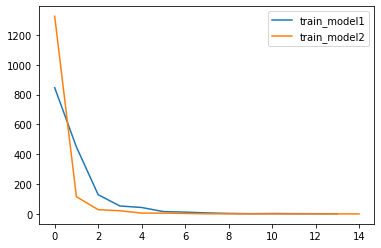

In [130]:
plt.plot(results.history['loss'], label='train_model1')
plt.plot(result2.history['loss'], label='train_model2')
plt.legend()

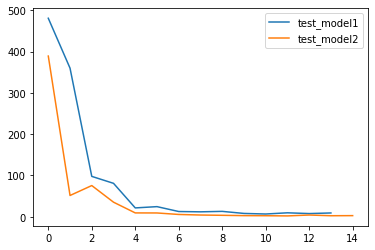

In [131]:
plt.plot(results.history['val_loss'], label='test_model1')
plt.plot(result2.history['val_loss'], label='test_model2')
plt.legend()

## model 3:
1. We use a mix of activation functions for our layers
2. We also use 30% of our entire training data for validation
3. Batch size, while training is 8

In [35]:
clear_session()
model3 = Sequential()
model3.add(Dense(32, input_shape=(feature_set.shape[1],), activation='relu'))
model3.add(Dense(64, activation='tanh'))
model3.add(Dense(128, activation='tanh'))
model3.add(Dense(256, activation=tf.nn.sigmoid))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(6, activation='softmax'))

In [36]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                928       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 3078      
Total params: 179,046
Trainable params: 179,046
Non-trainable params: 0
__________________________________________________

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model3.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
x_train, x_val, y_train, y_val = train_test_split(feature_set, Y, test_size=0.3, random_state=42)

In [38]:
result3 = model3.fit(x_train, y_train, callbacks=[es], batch_size=8, validation_data=[x_val, y_val], epochs=20)

Train on 132 samples, validate on 57 samples
Epoch 1/20
132/132 [==============================] - 2s 16ms/sample - loss: 1.9190 - accuracy: 0.3030 - val_loss: 2.0165 - val_accuracy: 0.2281
Epoch 2/20
132/132 [==============================] - 0s 4ms/sample - loss: 1.6785 - accuracy: 0.3258 - val_loss: 2.0746 - val_accuracy: 0.2632
Epoch 3/20
132/132 [==============================] - 1s 4ms/sample - loss: 1.7583 - accuracy: 0.2576 - val_loss: 1.8024 - val_accuracy: 0.2632
Epoch 4/20
132/132 [==============================] - 1s 8ms/sample - loss: 1.6859 - accuracy: 0.3182 - val_loss: 1.8568 - val_accuracy: 0.2281
Epoch 5/20
132/132 [==============================] - 1s 5ms/sample - loss: 1.6596 - accuracy: 0.3030 - val_loss: 1.8763 - val_accuracy: 0.2456
Epoch 6/20
132/132 [==============================] - 0s 4ms/sample - loss: 1.6832 - accuracy: 0.2348 - val_loss: 1.7723 - val_accuracy: 0.2632
Epoch 7/20
132/132 [==============================] - 0s 3ms/sample - loss: 1.6260 - accur

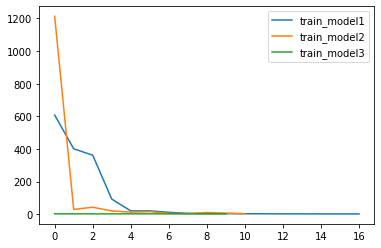

In [39]:
plt.plot(results.history['loss'], label='train_model1')
plt.plot(result2.history['loss'], label='train_model2')
plt.plot(result3.history['loss'], label='train_model3')
plt.legend()

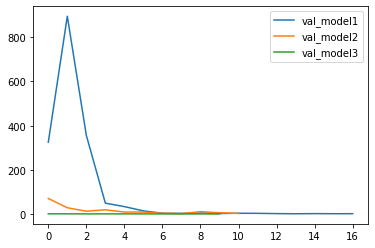

In [40]:
plt.plot(results.history['val_loss'], label='val_model1')
plt.plot(result2.history['val_loss'], label='val_model2')
plt.plot(result3.history['val_loss'], label='val_model3')
plt.legend()

## model4:
1. No usage of early stopping
2. addition of extra dense layer
3. We use 25% of our entire training data for validation
4. Our mini-batch size is 8

In [138]:
clear_session()
model4 = Sequential()
model4.add(Dense(32, input_shape=(feature_set.shape[1],), activation='relu'))
model4.add(Dense(64, activation='tanh'))
model4.add(Dense(128, activation='tanh'))
model4.add(Dense(256, activation=tf.nn.sigmoid))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(2048, activation=tf.keras.activations.tanh))
model4.add(Dense(1024, activation=tf.keras.activations.tanh))
model4.add(Dense(6, activation='softmax'))

In [139]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                928       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2

In [140]:
model4.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
x_train, x_val, y_train, y_val = train_test_split(feature_set, Y, test_size=0.1, random_state=42)

In [141]:
result4 = model4.fit(x_train, y_train, epochs=50, validation_data=[x_val, y_val], batch_size=32)

Train on 170 samples, validate on 19 samples
Epoch 1/50
170/170 [==============================] - 1s 8ms/sample - loss: 4.3688 - accuracy: 0.2412 - val_loss: 2.1517 - val_accuracy: 0.2105
Epoch 2/50
170/170 [==============================] - 0s 3ms/sample - loss: 1.7250 - accuracy: 0.2882 - val_loss: 1.8084 - val_accuracy: 0.2105
Epoch 3/50
170/170 [==============================] - 1s 3ms/sample - loss: 1.6367 - accuracy: 0.3294 - val_loss: 1.8086 - val_accuracy: 0.2105
Epoch 4/50
170/170 [==============================] - 0s 3ms/sample - loss: 1.6335 - accuracy: 0.2941 - val_loss: 1.8326 - val_accuracy: 0.2105
Epoch 5/50
170/170 [==============================] - 1s 3ms/sample - loss: 1.6181 - accuracy: 0.3471 - val_loss: 1.8348 - val_accuracy: 0.2632
Epoch 6/50
170/170 [==============================] - 0s 3ms/sample - loss: 1.6142 - accuracy: 0.3000 - val_loss: 1.8496 - val_accuracy: 0.1579
Epoch 7/50
170/170 [==============================] - 0s 3ms/sample - loss: 1.6551 - accura

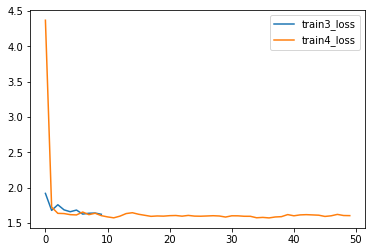

In [142]:
plt.plot(result3.history['loss'], label='train3_loss')
plt.plot(result4.history['loss'], label='train4_loss')
plt.legend()

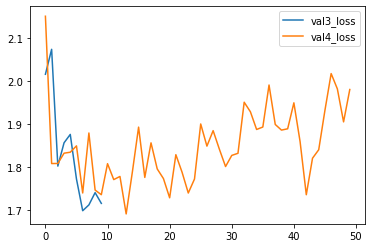

In [143]:
plt.plot(result3.history['val_loss'], label='val3_loss')
plt.plot(result4.history['val_loss'], label='val4_loss')
plt.legend()

In [58]:
testing_directory = "../emotion_dataset/testing/"
dirContents = os.listdir(testing_directory)
x_test, y_test = [], []
for music in dirContents:
    labelled_music = music.split('_')[1]
    if labelled_music[1] == 'P' or labelled_music[1] == 'N':
        music_features = getFeatures(testing_directory+music)
        x_test.append(music_features)
        y_test.append(labelled_music[:2])

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

In [68]:
x_test = np.array(x_test)
x_test.shape

### model 1 predictions:

In [156]:
y_pred = []
for i in range(x_test.shape[0]):
    x_i = x_test[i].reshape(1, x_test[i].shape[0])
    y_i_pred = model1.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.21428571428571427

In [105]:
print(y_test)

['TP', 'VN', 'AP', 'AN', 'TN', 'AP', 'AP', 'AN', 'AN', 'AN', 'TP', 'TN', 'TP', 'AP', 'TN', 'TP', 'TN', 'AN', 'AP', 'AN', 'AP', 'VP', 'VP', 'TN', 'TP', 'VN', 'TP', 'TN']


In [108]:
print(y_pred)

[array(['AN'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['TP'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['TP'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['TP'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['AP'], dtype='<U2'), array(['TP'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AN'], dtype='<U2')]


### model 2 predictions:

In [153]:
y_pred = []
for i in range(x_test.shape[0]):
    x_i = x_test[i].reshape(1, x_test[i].shape[0])
    y_i_pred = model2.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.17857142857142858

### model 3 predictions:

In [146]:
y_pred = []
for i in range(x_test.shape[0]):
    x_i = x_test[i].reshape(1, x_test[i].shape[0])
    y_i_pred = model3.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.10714285714285714

### model 4 predictions:

In [144]:
y_pred = []
for i in range(x_test.shape[0]):
    x_i = x_test[i].reshape(1, x_test[i].shape[0])
    y_i_pred = model4.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.21428571428571427